# Perform global statistics on a corpus

Given a corpus as a flat directory processed by *tools_ela.py* return global corpus statistics in human readable format. Performed global statistics are:

- [x] Number of words 
- [x] Number of latin words [for multilingual texts (actually for all texts)]
- [x] Number of lemmas
- [x] Number of latin types
- [x] Min/max/average lenghts of Latin types
- [x] Type token ratio
- [x] List of words and their frequencies
- [x] List of latin words and their frequencies
- [x] List of latin stopwords and their frequencies
- [x] List of lemmas, frequencies, variants (non-lemmatized)
- [x] List of persName instances and frequencies
- [x] List of geogName/placeName instances and frequencies

Results are provided as TXT and/or HTML files.

In [1]:
import os
import time
import globalstats
from tools_ela import STOPS_LIST

GST_SOURCES = os.path.join("RESULT", "tools_ela")
GST_RESULTS = os.path.join("RESULT", "globalstats")
GST_STATSFILENAME = "00_globalstats.txt"

# image mask for word cloud
GST_TXTCLOUD_MASK = os.path.join("DATA", "cloud_mask.png")
GST_TXTCLOUD_FREQTRESHOLD = 100
GST_TXTCLOUD_MINLENGTH = 5

if not os.path.exists(GST_RESULTS):
    os.makedirs(GST_RESULTS)

In [2]:
start = time.time()
globalstats.JUP_renderTextFiles(GST_SOURCES, GST_RESULTS, GST_STATSFILENAME)
print("elapsed: %s sec" % (time.time() - start))

elapsed: 2.2728888988494873 sec


## And now, for something completely different...

Some clouds.

The `JUP_getStats` retuns a dictionary that includes the following entries:

* `words`: list of words,
* `lat_words`: list of latin words,
* `lat_types`: list of latin types,
* `lat_lemmas`: list of latin lemmas,
* `num_words`: total number of words (length of the above list),
* `num_lat_words`: total number of latin words (length of the above list),
* `num_lat_types`: total number of latin types (length of the above list),
* `num_lat_lemmas`: total number of latin lemmas (length of the above list),
* `num_persons`: total number of mentioned people (length of the dictionary below),
* `num_places`: total number of mentioned places (length of the dictionary below),
* `lat_ttr`: Type/Token Ratio,
* `min_len_types`: minimum length of types,
* `max_len_types`: maximum length of types,
* `average_len_types`: average length of types,
* `freqs`: dictionary of frequences by word (as `{'word': frequency}`),
* `lat_freqs`: dictionary of frequences by latin word (as `{'word': frequency}`),
* `lat_lemmafreqs`: dictionary of frequences by lemma (as `{'lemma': frequency}`),
* `lat_nostopfreqs`: dictionary of frequences by word (as `{'word': frequency}`) for non-stopwords,
* `lat_stopfreqs`: dictionary of frequences by word (as `{'word': frequency}`) for stopwords,
* `lat_lemmas_occurrences`: dictionary of lemma occurrences, as `{'lemma': ['occ1', ..., 'occN']}`,
* `personfreqs`: dictionary of people frequencies (excluding authors, as `{'name': frequency}`),
* `placefreqs`: dictionary of place frequencies (as `{'name': frequency}`),
* `freqs_lines`: human readable list of frequencies to use in templates (from `freqs`),
* `lat_lemmafreqsoccurrences_lines`: human readable list of lemma frequencies followed by occurrences to use in templates (combined from `lat_lemmafreqs` and `lat_lemmas_occurrences`),
* `lat_nostopfreqs_lines`: human readable list of stopword frequencies to use in templates (from * `lat_nostopfreqs`),
* `personfreqs_lines`: human readable list of people frequencies to use in templates (from `personfreqs`).
* `placefreqs_lines`: human readable list of place frequencies to use in templates (from `placefreqs`).

The lists in human readable form are still machine usable, although the explicit compound variables are more suitable to use in notebook calculation. Below the environment is prepared to create some *word clouds* from the statistics.

*Note:* The graphs are shown inside a *matplotlib widget* that allows image download. To reset this comment the `%matplotlib widget` out.

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

plt.rcParams["figure.figsize"] = 20,20
cloud_mask_img = Image.open(GST_TXTCLOUD_MASK)
cloud_mask_width = cloud_mask_img.size[0]
cloud_mask_height = cloud_mask_img.size[1]
cloud_mask = np.array(cloud_mask_img)

# %matplotlib widget
%matplotlib inline

stats = globalstats.JUP_getStats(GST_SOURCES)

### Cloud Examples

A word cloud based on significant (non-stopword) words.

working...


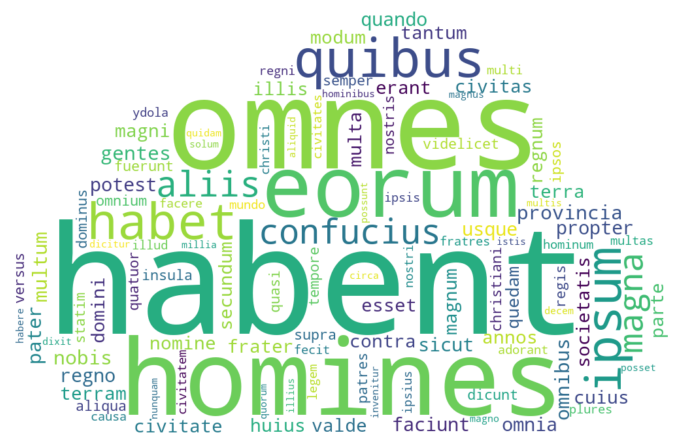

elapsed: 4.090865850448608 sec


In [4]:
print("working...")
start = time.time()
sigwordfreqs = stats['lat_nostopfreqs']

# filter out some less useful terms
sigwordfreqs = dict({t:f for (t, f) in sigwordfreqs.items()
                     if f >= GST_TXTCLOUD_FREQTRESHOLD
                     and len(t) >= GST_TXTCLOUD_MINLENGTH
                    })

wc = WordCloud(background_color="white",
               max_words=1000,
               mask=cloud_mask, width=cloud_mask_width, height=cloud_mask_height)
wc.generate_from_frequencies(sigwordfreqs)

outfile = os.path.join(GST_RESULTS, "01_wcloud_lat_nostopfreqs.png")
wc.to_file(outfile)

fig = plt.figure(figsize=(12, 12))

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
print("elapsed: %s sec" % (time.time() - start))

working...


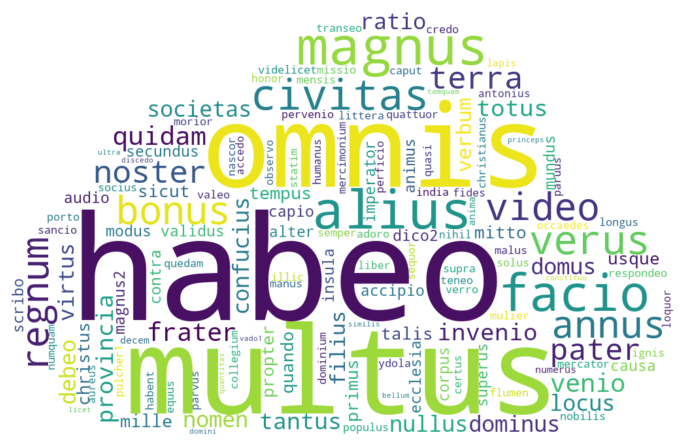

elapsed: 4.413451433181763 sec


In [5]:
print("working...")
start = time.time()
lemmafreqs = stats['lat_lemmafreqs']

# filter out some less useful terms
lemmafreqs = dict({t:f for (t, f) in lemmafreqs.items()
                   if f >= GST_TXTCLOUD_FREQTRESHOLD
                   and len(t) >= GST_TXTCLOUD_MINLENGTH
                   and t not in STOPS_LIST
                  })

wc = WordCloud(background_color="white",
               max_words=1000,
               mask=cloud_mask, width=cloud_mask_width, height=cloud_mask_height)
wc.generate_from_frequencies(lemmafreqs)

outfile = os.path.join(GST_RESULTS, "01_wcloud_lat_lemmafreqs.png")
wc.to_file(outfile)

fig = plt.figure(figsize=(12, 12))

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
print("elapsed: %s sec" % (time.time() - start))

## Operations on TEI Raw Data

The `JUP_getRawTEIData` returns data from TEI headers and TEI lists found in the examined files in *raw* form, that is id does not perform any kind of JSON interpretation upon reading JSON files. It returns instead nested lists and dictionaries that can be examined as their structure is known.

The container form is:

```
dictionary = {
    'file_basename_01': [ HEADER_DATA, LISTS_DATA ],
    'file_basename_02': [ HEADER_DATA, LISTS_DATA ],
    ...
    'file_basename_NN': [ HEADER_DATA, LISTS_DATA ],
}
```

Within it the data structures develop as follows:

```
HEADER_DATA = {
    "file_basename": (base of filename, no extensions or suffixes),
    "xmltei_attributes": {
        "author": (text author normalized name),
        "author-viaf": (URL to author's VIAF record),
        "title": (original title),
        "date": { "value": (date value, as YYYY-MM-DD, or YYYY-MM, or YYYY) },
        "form": [ (composition format, not normalized, informal) ],
        "source": (original text source, not normalized, informal),
        "genre": (text genre, not normalized, informal),
        "place": [ (place name, normalized) ],
        "language": [ { "value": (main text language, normalized) } ],
        "oclc-reference": (URL to OCLC reference),
        "sinica-2.0": (reference in Sinica 2.0),
        "cct-database": (URL to reference in CCT database),
        "digitized": (reference to previous digitizer),
        "availability": 
            {
                "value": (who made this available),
                "target": (reference URL) 
            },
        "publisher": { "ref": (URL of publisher), "value": (name of publisher) },
        "first-tei-pubdate": { "value": (date of first TEI publication, informal) },
        "changes": [ (list of changes, in the following format:)
            {
                "when": (change date, in YYYY-MM-DD),
                "who": (ID of changer),
                "change": (change description, informal)
            }
        ],
        "editorialdecl": (editorial declaration as a simple text, informal),
        "projectdesc":  (project description as a simple text, informal)
    }
}
```

Missing values are usually represented by a *dash*. The TEI lists follow a simpler structure, although more variable in terms of contents and length:

```
LISTS_DATA = {
    "file_basename": (base of filename, no extensions or suffixes),
    "xmltei_places": {
        "list": [
            {
                "tag": (either placeName or geogName),
                "value": (actual value found in text),
                "key": (normalized name of the place),
                "ref": (place unique reference URL),
                "lat": (latitude),
                "lon": (longitude)
            },
            ...
        ],
        "frequencies": { (dictionary of entries as "place name": frequency) }
    },
    "xmltei_persons": {
        "list": [
            {
                "tag": "persName",
                "value": (actual value found in text),
                "key": (normalized name),
                "ref": (URL to unique record in VIAF)
            },
            ...
        ],
        "frequencies": { (dictionary of entries as "person name": frequency) }
    },
    "xmltei_dates": [
        {
            "iso": (date in YYY-MM-DD format),
            "value": (actual value found in text)
        },
        ...
    ]
}
```

These structures can be filtered or inspected to perform data mining operations and more specific statistics. To help in this task two classes are provided:

* `TEIData` holds a single record with both attributes
* `TEIDataList` holds a list/dictionary of elements in the above form.

The second class can be built directly from the result of `JUP_getRawTEIData`.

`TEIData` provides `get_attribute()` and `get_list()` to retrieve a TEI attribute or a list of TEI elements, accessible by providing a path to the attribute/list in dotted notation; `TEIDataList` handles lists of `TEIData`, and provides a way to access them by index (integer or file base name) or via filters based on attributes or the fact that an entity list might contain a certain value.

In [6]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

tdlist = globalstats.TEIDataList(globalstats.JUP_getRawTEIData(GST_SOURCES))

In [7]:
d0 = tdlist.get_item('ELA_2_2_bonaventura_ibanez_epistola_ad_episcopos_tunkinenses_1675')
d0.get_attribute('xmltei_attributes.author')

'Ibañez, Bonaventura O.F.M.'

In [8]:
it = d0.get_list('xmltei_places.list.key')
li = list(it)
pp.pprint(li)

[   'China',
    'Macaum',
    'China',
    'China',
    'Chantong',
    'China',
    'China',
    'Sinae',
    'Roma',
    'Macaum']


In [9]:
docs = tdlist.filter_by_attribute('xmltei_attributes.author', 'Ibañez, Bonaventura O.F.M.')
for d in docs:
    print(d.get_attribute('file_basename'))

ELA_2_2_ibanez_brevis_relatio
ELA_2_2_bonaventura_ibanez_epistola_ad_episcopos_tunkinenses_1675
ELA_2_2_bonaventura_ibanez_epistola_ad_cardinales_iulio1672
ELA_2_2_bonaventura_ibanez_epistola_ad_episcopos_tunkinenses_1674
ELA_2_2_bonaventura_ibanez_epistola_ad_cardinales_1672


In [11]:
placedocs = tdlist.filter_by_list_containing('xmltei_places.list.key', 'Macaum')
for d in placedocs:
    print(d.get_attribute('file_basename'))

ELA_2_2_ibanez_brevis_relatio
ELA_2_2_bonaventura_ibanez_epistola_ad_episcopos_tunkinenses_1675
ELA_2_2_bonaventura_ibanez_epistola_ad_cardinales_iulio1672
ELA_2_2_montefusculus_acta_congregationis_1650
ELA_2_2_majorica_indiculus_alphabeticus_1654
ELA_2_2_catalogo_para_claudio_aqua_viva_1588
ELA_2_2_elenchus_patrum_jap_165409
ELA_2_2_cathalogus_domorum_1954
ELA_2_2_valignanus_catalogus_160301
ELA_2_2_valignanus_catalogus_159301
ELA_2_2_bonaventura_ibanez_epistola_ad_episcopos_tunkinenses_1674
ELA_2_2_cardim_informatio_1646
ELA_2_2_majorica_tertius_catalogus_provinciae_japonicae
ELA_2_2_bonaventura_ibanez_epistola_ad_cardinales_1672
ELA_2_2_augustinusapaschali_epistola_16841215
ELA_2_2_primus_catalogus_jap_1654
ELA_2_2_marquez_catalogus_philippinarum_16210501


These utilities allow us to create networks, especially on *places* and *people* - where *people* can also include authors.

## Network Analysis

### People Networks

The first network is based on authors and people mentioned in their documents. People are nodes, and edges connect authors to mentioned people. Edges are given a weight i.e. the number of times an author mentions someone.

**Note:** we remove relations with weight less than `WEIGHT_TRESHOLD` in order not to overpopulate the graph.

*Here we also define a list of colors to be assigned to nodes according to the number of connected edges, in order to produce a heat map along with the graph.*

working...
elapsed: 0.9635848999023438 sec


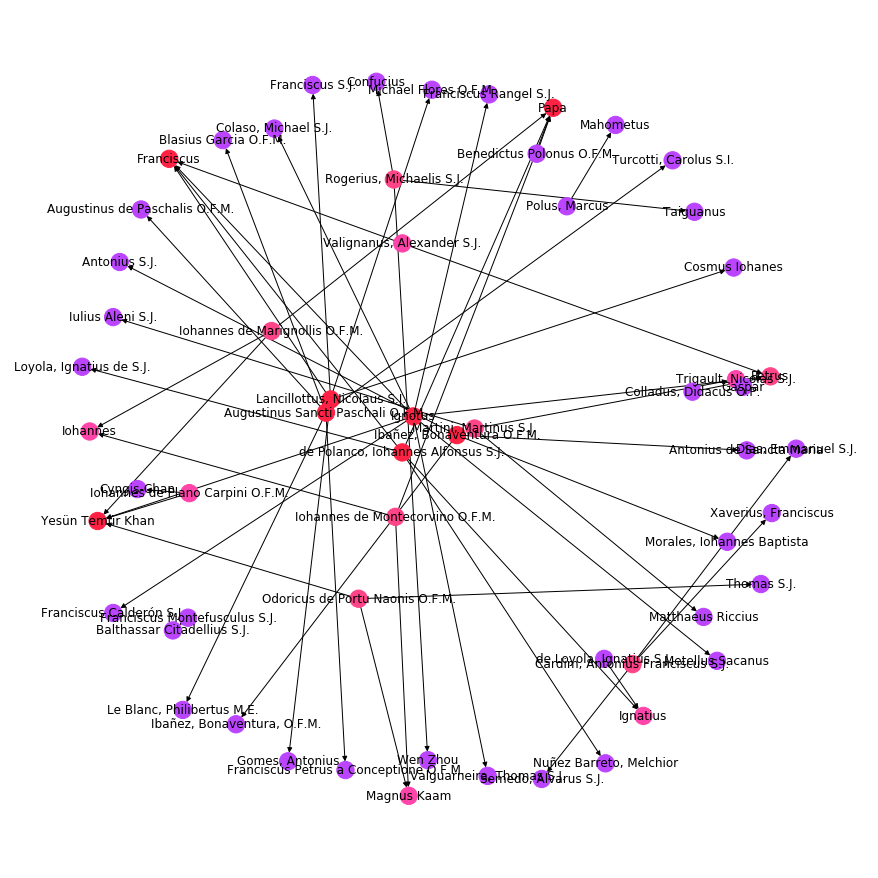

In [19]:
import networkx as nx
from collections import Counter

doc_names = tdlist.keys()

COLOR_LIST = ['#4422ff', '#bb44ff', '#ff44aa', '#ff4488', '#ff2244']
WEIGHT_TRESHOLD = 4

print("working...")
start = time.time()

li = []
for x in doc_names:
    doc = tdlist.get_item(x)
    author = doc.get_attribute('xmltei_attributes.author')
    people = list(doc.get_list('xmltei_persons.list.key'))
    for y in people:
        li.append((author, y))

counter = Counter(li)

G1 = nx.DiGraph()
for x in counter:
    w = counter[x]
    if w >= WEIGHT_TRESHOLD:
        G1.add_edge(x[0], x[1], weight=w)

pos = nx.spring_layout(G1)
colors = []
for node in G1:
    d = nx.degree(G1, node)
    if d > 4:
        colors.append(COLOR_LIST[4])
    else:
        colors.append(COLOR_LIST[d])
        
fig = plt.figure(figsize=(12, 12))
nx.draw(G1, pos=pos, with_labels=True, node_color=colors)

outfile = os.path.join(GST_RESULTS, "00_net_AuthorsToPeople-wGT%s.png" % WEIGHT_TRESHOLD)
fig.savefig(outfile)
outfile = os.path.join(GST_RESULTS, "00_net_AuthorsToPeople-wGT%s.dot" % WEIGHT_TRESHOLD)
nx.drawing.nx_agraph.write_dot(G1, outfile)
print("elapsed: %s sec" % (time.time() - start))

The second graph is about people appearing in documents: two persons are related if they appear in one document, and the more the documents they appear in, the higher the weight of the connection.

working...
elapsed: 0.526705265045166 sec


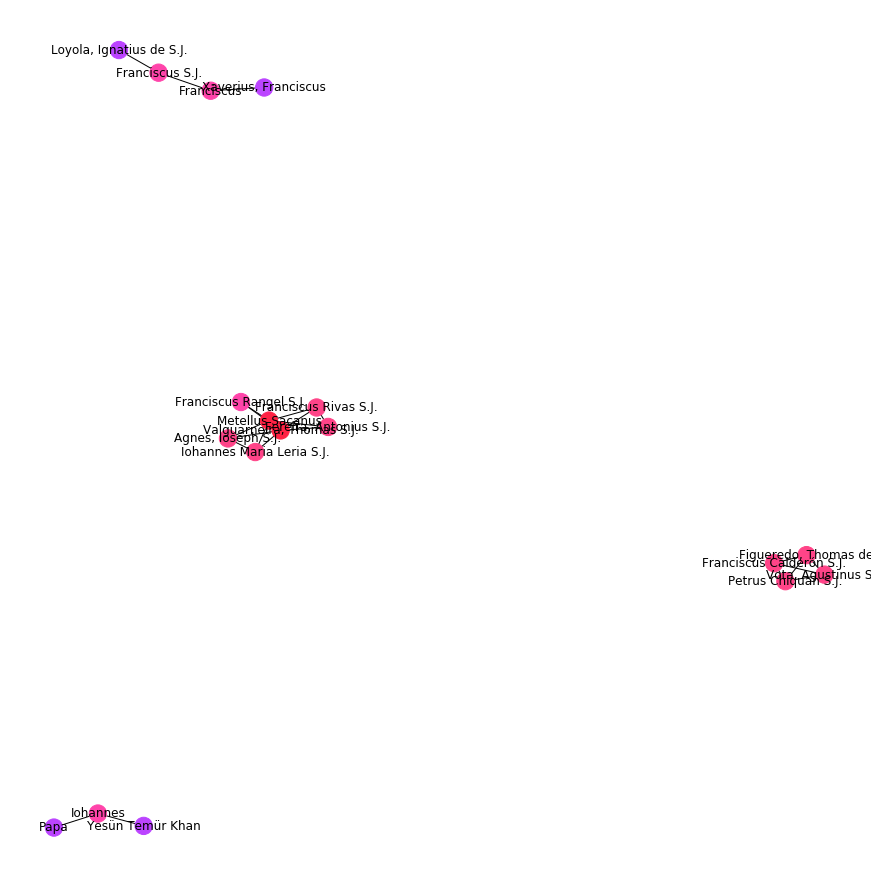

In [20]:
from itertools import combinations

WEIGHT_TRESHOLD = 4

print("working...")
start = time.time()

combo = {}
for x in doc_names:
    doc = tdlist.get_item(x)
    people = list(doc.get_list('xmltei_persons.list.key'))
    #author = doc.get_attribute('xmltei_attributes.author')
    #people.append(author)
    lc = combinations(set(people), 2)
    for x in lc:
        if x in combo:
            combo[x] += 1
        else:
            combo[x] = 1

G2 = nx.Graph()
for x in combo:
    if combo[x] >= WEIGHT_TRESHOLD:
        G2.add_edge(x[0], x[1], weight=combo[x])

pos = nx.spring_layout(G2)
colors = []
for node in G2:
    d = nx.degree(G2, node)
    if d > 4:
        colors.append(COLOR_LIST[4])
    else:
        colors.append(COLOR_LIST[d])

fig = plt.figure(figsize=(12, 12))
nx.draw(G2, pos=pos, with_labels=True, node_color=colors)

outfile = os.path.join(GST_RESULTS, "00_net_PeopleInSameDoc-wGT%s.png" % WEIGHT_TRESHOLD)
fig.savefig(outfile)
outfile = os.path.join(GST_RESULTS, "00_net_PeopleInSameDoc-wGT%s.dot" % WEIGHT_TRESHOLD)
nx.drawing.nx_agraph.write_dot(G2, outfile)
print("elapsed: %s sec" % (time.time() - start))

### Place Networks

The third graph repeats the same concept as the second one, but taking places into account.

working...
elapsed: 0.4827561378479004 sec


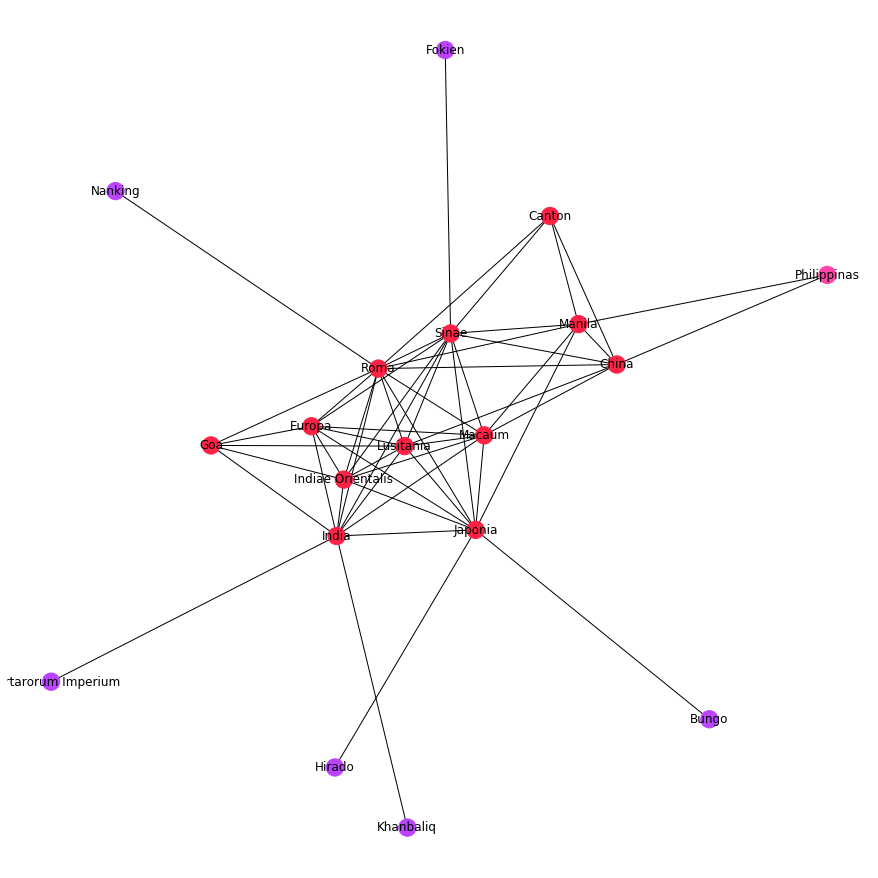

In [18]:
WEIGHT_TRESHOLD = 5

print("working...")
start = time.time()

combo = {}
for x in doc_names:
    doc = tdlist.get_item(x)
    places = list(doc.get_list('xmltei_places.list.key'))
    lc = combinations(set(places), 2)
    for x in lc:
        if x in combo:
            combo[x] += 1
        else:
            combo[x] = 1

G3 = nx.Graph()
for x in combo:
    if combo[x] >= WEIGHT_TRESHOLD:
        G3.add_edge(x[0], x[1], weight=combo[x])

pos = nx.spring_layout(G3)
colors = []
for node in G3:
    d = nx.degree(G3, node)
    if d > 4:
        colors.append(COLOR_LIST[4])
    else:
        colors.append(COLOR_LIST[d])

fig = plt.figure(figsize=(12, 12))
nx.draw(G3, pos=pos, with_labels=True, node_color=colors)

outfile = os.path.join(GST_RESULTS, "00_net_PlacesInSameDoc-wGT%s.png" % WEIGHT_TRESHOLD)
fig.savefig(outfile)
outfile = os.path.join(GST_RESULTS, "00_net_PlacesInSameDoc-wGT%s.dot" % WEIGHT_TRESHOLD)
nx.drawing.nx_agraph.write_dot(G3, outfile)
print("elapsed: %s sec" % (time.time() - start))

More network graphs can be produced by grouping using other criteria.